# MIMICIII Data Experiment - Combined notes
<p>#TODO: Needs description of what this file is</p>

# Initialize environment

In [1]:
import sys
import os

WORKING_DIR = f'{os.getcwd()}' # assume notebook is in root of magritte scratch dir
MAGRITTE_DIR = f'{WORKING_DIR}/../../magritte'
UTILITIES_DIR = f'{MAGRITTE_DIR}/utilities'

DATA_DIR = f'{MAGRITTE_DIR}/../data/mimiciii/working'

# Add the UTILITY_DIR to the path to import files
sys.path.append(UTILITIES_DIR)

In [2]:
import pandas as pd
import pickle
import DataUtils

# Load Data
<p>Loading the MIMIC Dataset (Combined)<br>


In [3]:
# Loading the IMDB Dataset
ORIG_DF = pd.read_pickle(f'{DATA_DIR}/notes_combined.pkl.gz')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ORIG_DF['ICD9_CODE'] = le.fit_transform(ORIG_DF['ICD9_CODE'])

# Changing target column from string to 0,1. Label encoding not yet included in framework
#ORIG_DF['sentiment'] = np.where(ORIG_DF['sentiment']=='positive', 1, 0)

DataUtils.exploreDataframe(ORIG_DF)

dataframe shape: (12655, 2)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12655 entries, 4 to 58326
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TEXT       12655 non-null  object
 1   ICD9_CODE  12655 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 296.6+ KB
None

First 5 in dataframe


,TEXT,ICD9_CODE
4,Admission Date: [**2162-5-16**] ...,1
7,Admission Date: [**2177-3-12**] ...,1
14,Neonatology\nPatient is term infant sent to NI...,2
15,Admission Date: [**2170-9-19**] ...,1
16,Admission Date: [**2191-7-13**] Dischar...,2



Last 5 in dataframe


,TEXT,ICD9_CODE
58293,Admission Date: [**2194-2-4**] D...,0
58294,Admission Date: [**2109-6-21**] ...,1
58299,Newborn Med Attending\n\nAsked by Dr [**Last N...,2
58314,Neonatology NP Triage Note\nThis is a full ter...,2
58326,Admission Date: [**2119-2-18**] ...,1



Null value count by column:


TEXT         0
ICD9_CODE    0
dtype: int64

In [4]:
# Setting up variables for later usage in DataPackage
DATA_COLUMN = 'TEXT'
TARGET_COLUMN = 'ICD9_CODE'
UNIQUE_COLUMN = None   # Unique index column. If None, one will be created

# DataPackageParams
<p>#TODO: Needs description of what DataPackageParams is</p>

In [5]:
# DataPackageParams are optional. Can do it manually or store and save the params for re-run
from DataPackage import DataPackageParams
myDPP = DataPackageParams(
                    process_params=False, # True=run all data cleanup/setup on load
                    
                    # Class Balance
                    sample_size = None, # Can be set to an absolute value. None means undersample to smallest
                                        
                    # Text Cleaning Params
                    fix_unicode=True,  # fix various unicode errors
                    to_ascii=True,  # transliterate to closest ASCII representation
                    lower=True,  # lowercase text
                    no_line_breaks=False,  # fully strip line breaks as opposed to only normalizing them
                    no_urls=False,  # replace all URLs with a special token
                    no_emails=False,  # replace all email addresses with a special token
                    no_phone_numbers=False,  # replace all phone numbers with a special token
                    no_numbers=False,  # replace all numbers with a special token
                    no_digits=False,  # replace all digits with a special token
                    no_currency_symbols=False,  # replace all currency symbols with a special token
                    no_punct=True,  # remove punctuations
                    replace_with_punct="",  # instead of removing punctuations you may replace them
                    replace_with_url="<URL>",
                    replace_with_email="<EMAIL>",
                    replace_with_phone_number="<PHONE>",
                    replace_with_number="<NUMBER>",
                    replace_with_digit="0",
                    replace_with_currency_symbol="<CUR>",
                    lang="en",  # set to 'de' for German special handling

                    # Remove stopwords
                    remove_stopwords=True, # Removes stopwords
                    stopword_language='english',
        
                    # train test split params
                    stratifyColumn=None, # If None will be autoset to target_column in DataPackage
                    train_size=0.8, # Can be percent or absolute number
                    random_state=765,
                    shuffle=True,

                    # Encoding params
                    encoding_type='TFIDF', # Currently only supports TFIDF encoding, TBA: BERT, GLOVE, Word2Vec
                    max_features=100 # Currently only used in TFIDF
                    )

# Data Package
<p>#TODO: Needs description of what this file is</p>

In [6]:
# Create the DataPackage
from DataPackage import DataPackage
myDP = DataPackage(original_data = ORIG_DF,
                   data_column = DATA_COLUMN,
                   target_column = TARGET_COLUMN,
                   unique_column = UNIQUE_COLUMN,
                   data_package_params = myDPP)

# Experiment Manager

In [7]:
from ExperimentManager import ExperimentManager

In [8]:
from xgboost import XGBClassifier
untrained_model_1 = XGBClassifier(eval_metric='mlogloss', 
                                  tree_method='gpu_hist',
                                  use_label_encoder=False,
                                  max_depth=5,
                                  n_estimators=100)

In [9]:
myEM = ExperimentManager(project_name='mimiciii_LL',
                         experiment_name='XGB depth:5 est:100',
                         experiment_method='supervised',
                         untrained_model=untrained_model_1,
                         data_package=myDP)

                         

DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: TEXT
---> targetColumn: ICD9_CODE
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (12655, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (12655, 3)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False

DataExperiment summary:
---> projectName: mimiciii_LL
---> experimentName: XGB depth:5 est:100
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,


In [10]:
from sklearn.ensemble import RandomForestClassifier
untrained_model_2 = RandomForestClassifier(n_jobs=-1,
                                     max_depth=10,
                                     n_estimators=10)

myEM.add_experiment(experiment_name='RF depth:10 est:10',
                    experiment_method='supervised',
                    untrained_model=untrained_model_2)


DataExperiment summary:
---> projectName: mimiciii_LL
---> experimentName: RF depth:10 est:10
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
RandomForestClassifier(max_depth=10, n_estimators=10, n_jobs=-1)



In [11]:
untrained_model_3 = XGBClassifier(eval_metric='mlogloss', 
                           tree_method='gpu_hist',
                           use_label_encoder=False,
                           max_depth=2,
                           n_estimators=20)

myEM.add_experiment(experiment_name='XGB depth:2 est:20',
                    experiment_method='supervised',
                    untrained_model=untrained_model_3)


DataExperiment summary:
---> projectName: mimiciii_LL
---> experimentName: XGB depth:2 est:20
---> experimentMethod: supervised
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=2,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method='gpu_hist', use_label_encoder=Fals

In [12]:
from sklearn.cluster import KMeans
untrained_model_4 = KMeans(n_clusters=5, random_state=765)
myEM.add_experiment(experiment_name='KMeans n=5',
                    experiment_method='unsupervised',
                    untrained_model=untrained_model_4)



DataExperiment summary:
---> projectName: mimiciii_LL
---> experimentName: KMeans n=5
---> experimentMethod: unsupervised
---> Unsupervised experiment with target column ICD9_CODE
---> ---> prediction has been mapped: False
---> isDataPackageLoaded: True
---> isProcessed: False
---> isModelLoaded: False
---> isModelPredicted: False
---> isLearningCurveCreated: False
---> isUntrainedModelLoaded: True
KMeans(n_clusters=5, random_state=765)



# ExperimentManager - run_experiment

In [13]:
myEM.list_experiments()

idx Processed Method      Experiment name
  0     False   supervised XGB depth:5 est:100
  1     False   supervised RF depth:10 est:10
  2     False   supervised XGB depth:2 est:20
  3     False unsupervised KMeans n=5


Data package has not been processed. Processing now.
---------------------------------------------------------------------------
DataPackage summary
Attributes:
---> uniqueColumn: uuid
---> dataColumn: TEXT
---> targetColumn: ICD9_CODE
Data:
---> isOrigDataLoaded: True
---> isWorkingDataLoaded: True
---> isCleanDataLoaded: False
---> isTrainDataLoaded: False
---> isTestDataLoaded: False

Original Data:
---> original data shape: (12655, 3)
Cleaned Data:
---> clean data shape: "N/A"
Working Data:
---> working data shape: (12655, 3)

Process:
---> isProcessed: False
---> isCleaned: False
---> isStopWorded: False
---> isBalanced: False
---> isEncoded: False
---> isTrainTestSplit: False
Processing data package with provided parameters


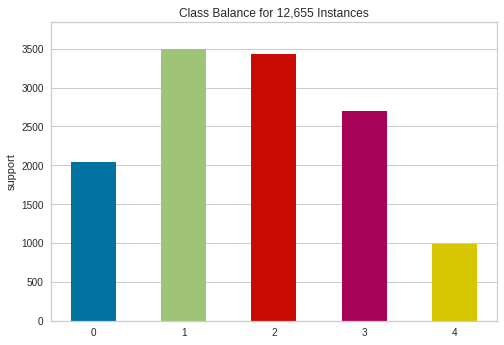

Undersampling data to match min class: 4 of size: 993


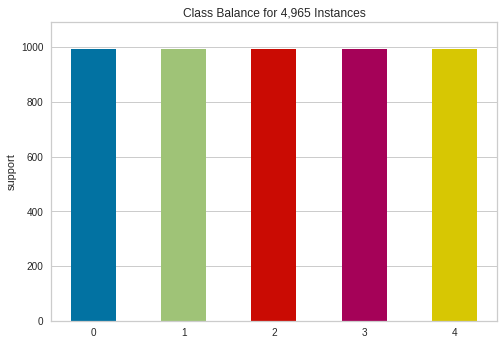

,ICD9_CODE,ttlCol
0,0,993
1,1,993
2,2,993
3,3,993
4,4,993


Cleaning text column...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4965/4965 [01:57<00:00, 42.17it/s]
[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Removing stopwords...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4965/4965 [00:34<00:00, 142.67it/s]



Encoding to TF-IDF with max_features=100
Encoding completed. Feature list:
['20', '24', 'abd', 'abdomen', 'active', 'air', 'alert', 'assessment', 'attending', 'baby', 'benign', 'blood', 'bowel', 'bp', 'bs', 'care', 'cares', 'chest', 'clear', 'clip', 'cont', 'continue', 'cpap', 'current', 'day', 'discharge', 'exam', 'family', 'far', 'feeding', 'feeds', 'fen', 'fio2', 'first', 'follow', 'given', 'good', 'history', 'hospital', 'hours', 'hr', 'increased', 'infant', 'known', 'last', 'lastname', 'left', 'mg', 'mild', 'ml', 'mom', 'monitor', 'murmur', 'name', 'needs', 'neonatology', 'ni', 'normal', 'note', 'noted', 'npn', 'o2', 'open', 'pain', 'patient', 'plan', 'pm', 'po', 'present', 'progress', 'pt', 'ra', 'reason', 'remains', 'resp', 'respiratory', 'retractions', 'right', 'rr', 'sats', 'sepsis', 'shift', 'soft', 'sounds', 'spells', 'spits', 'stable', 'status', 'stool', 'support', 'temp', 'tf', 'time', 'today', 'tolerating', 'tube', 'voiding', 'weight', 'well', 'wt']

Completed train/test 

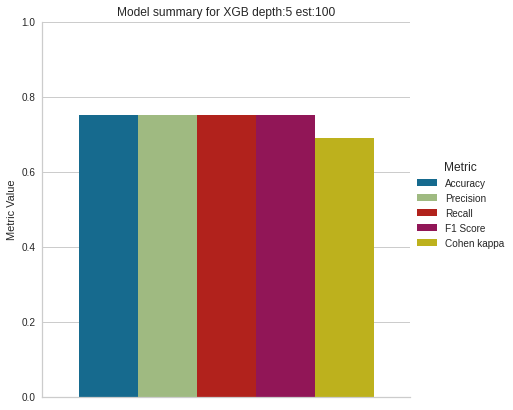

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.75       0.75    0.75      0.75         0.69


Completed. Wall time[h:m:s]: 00:00:02


---------------------------------------------------------------------------
Processing experiment: [1] RF depth:10 est:10

Training model for RF depth:10 est:10. Completed. Wall time[h:m:s]: 00:00:00
Predicting model for RF depth:10 est:10. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


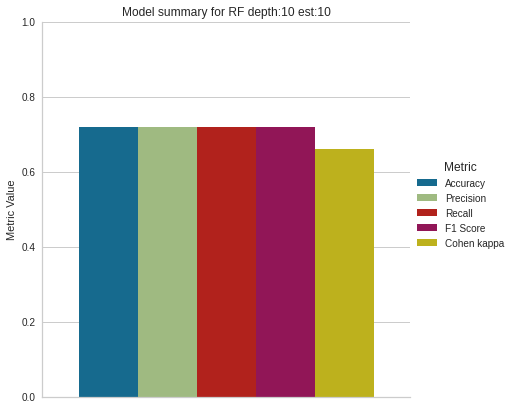

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  RF depth:10 est:10      0.72       0.72    0.72      0.72         0.66


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [2] XGB depth:2 est:20

Training model for XGB depth:2 est:20. Completed. Wall time[h:m:s]: 00:00:00
Predicting model for XGB depth:2 est:20. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


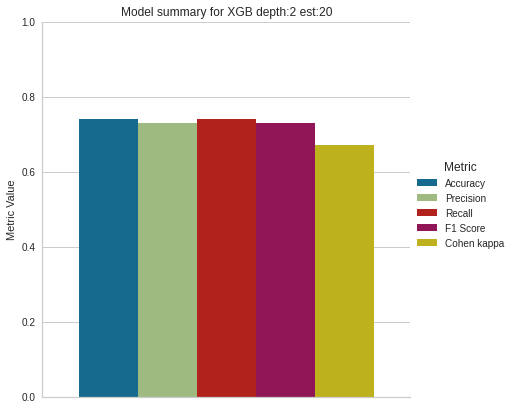

           Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:2 est:20      0.74       0.73    0.74      0.73         0.67


Completed. Wall time[h:m:s]: 00:00:00


---------------------------------------------------------------------------
Processing experiment: [3] KMeans n=5

Training model for KMeans n=5. Completed. Wall time[h:m:s]: 00:00:01
Predicting model for KMeans n=5. Completed. Wall time[h:m:s]: 00:00:00

Model Stats:


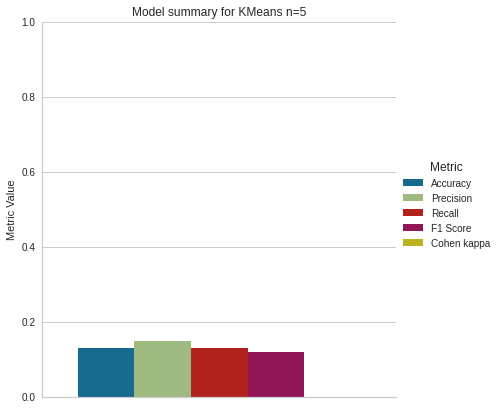

   Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  KMeans n=5      0.13       0.15    0.13      0.12        -0.09


Completed. Wall time[h:m:s]: 00:00:01


Processing complete. Displaying model comparison


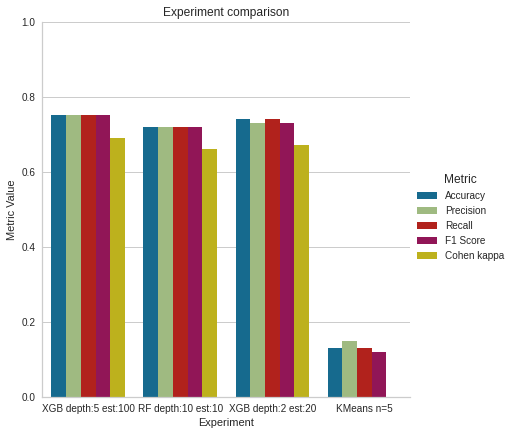

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.75       0.75    0.75      0.75         0.69
1   RF depth:10 est:10      0.72       0.72    0.72      0.72         0.66
2   XGB depth:2 est:20      0.74       0.73    0.74      0.73         0.67
3           KMeans n=5      0.13       0.15    0.13      0.12        -0.09

Processing experiments complete. Wall time[h:m:s]: 00:02:45


In [14]:
myEM.run_experiment(index=None) # index=None means process all experiements, 
                                # otherwise provide index of single experiment to run

AttributeError: 'DataExperiment' object has no attribute 'show_cluster_comparison'

# Scratchpad

In [16]:
import DataExperimentSupport as des
import importlib

In [17]:
importlib.reload(des)

<module 'DataExperimentSupport' from '/home/magni/ML_Root/project_root/mimic-iii_LL/notebooks/../../magritte/utilities/DataExperimentSupport.py'>

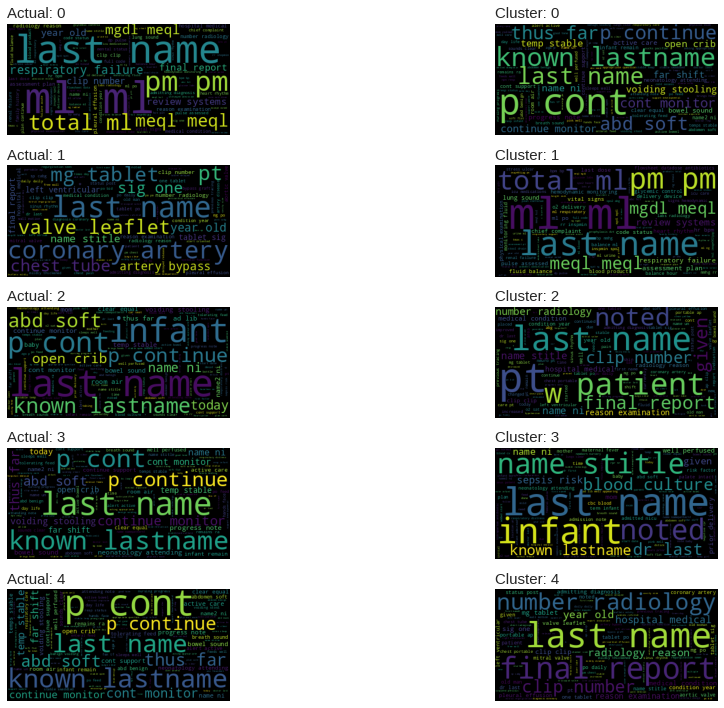

In [18]:
myEM.experiments[3].show_cluster_mapping_cloud()

In [19]:
_ = myEM.experiments[3].get_unsupervised_mapping(showNumResults=5,
                                                 auto_mapping=False)


Current results of comparison between clusters and actuals
   y_test  y_pred  record_count
0       4       0           175
1       2       3           145
2       1       4           121
3       3       3           106
4       3       0            92
Unique values in y_test: 5
Unique values in y_pred: 5
Unique values in y_test and y_pred: 5
Number of rows/combinations: 14

One mapping not found in predictions. Adding to map
Display automapped prediction to actual results (no data changed)
{4: 1, 0: 4, 3: 3, 2: 0, 1: 2}


{4: 1, 0: 4, 3: 3, 2: 0, 1: 2}

In [20]:
_ = myEM.experiments[3].get_unsupervised_mapping(showNumResults=5,
                                                 auto_mapping=True)


Current results of comparison between clusters and actuals
   y_test  y_pred  record_count
0       4       0           175
1       2       3           145
2       1       4           121
3       3       3           106
4       3       0            92
Unique values in y_test: 5
Unique values in y_pred: 5
Unique values in y_test and y_pred: 5
Number of rows/combinations: 14

One mapping not found in predictions. Adding to map
Auto mapping the results
Mapping predicted to actual: {4: 1, 0: 4, 3: 3, 2: 0, 1: 2}
   y_test  y_pred
0       1       1
1       0       1
2       1       0
3       4       4
4       3       3
5       0       1
6       0       0
7       4       3
8       1       1
9       0       2
Next steps: set new prediction. Save original model prediction


{4: 1, 0: 4, 3: 3, 2: 0, 1: 2}

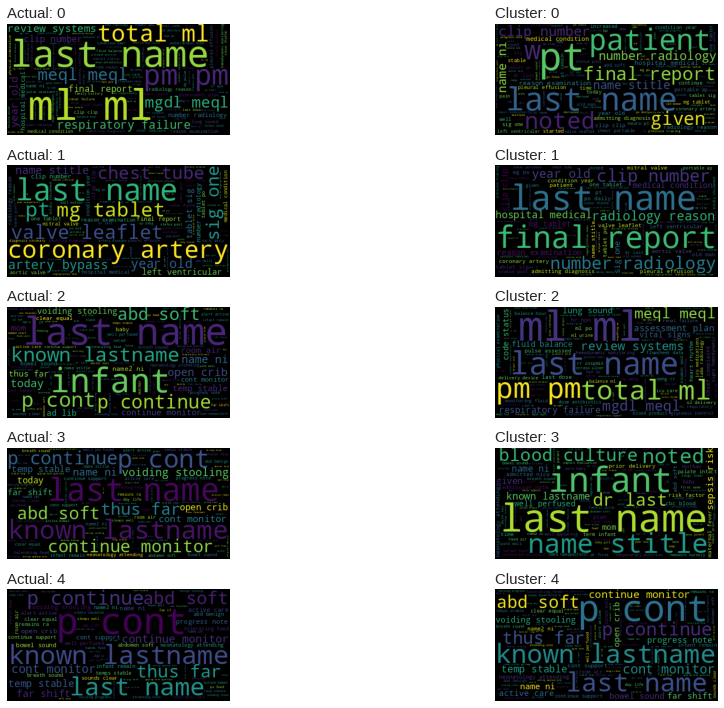

In [22]:
myEM.experiments[3].show_cluster_mapping_cloud()

Processing complete. Displaying model comparison


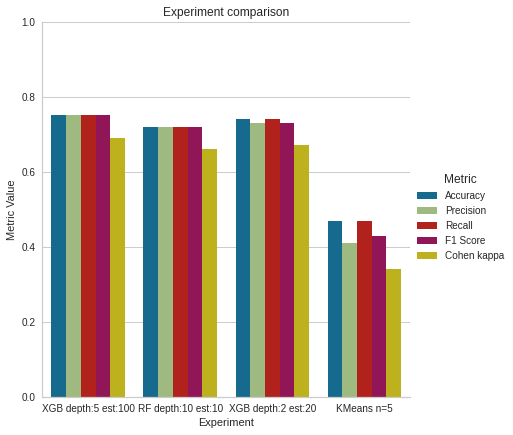

            Experiment  Accuracy  Precision  Recall  F1 Score  Cohen kappa
0  XGB depth:5 est:100      0.75       0.75    0.75      0.75         0.69
1   RF depth:10 est:10      0.72       0.72    0.72      0.72         0.66
2   XGB depth:2 est:20      0.74       0.73    0.74      0.73         0.67
3           KMeans n=5      0.47       0.41    0.47      0.43         0.34


In [23]:
_ = myEM.show_model_comparison()